# Prodigy Finance ComputeFest Exploratory Visualization Contest 2017
**Team**: Stephen Camera-Murray and John Camera-Murray
  
**Due Date: ** Thursday, January 12th, 2017 at 11:59pm

#### Import libraries

In [120]:
# import libraries
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import bokeh

from bokeh.charts import Scatter, Histogram
from bokeh.models import HoverTool, ColumnDataSource
from bokeh.io     import output_notebook, show
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file

%matplotlib inline

output_notebook()

# suppress warnings
warnings.filterwarnings ( 'ignore' )

Loading BokehJS ...

#### Load data and view it

In [26]:
# load data into a pandas df
forestDF = pd.read_csv ( './datasets/covtype.data.gz', header=None )

# add column names
forestDF.columns = \
'Elevation Aspect Slope Horizontal_Distance_To_Hydrology Vertical_Distance_To_Hydrology Horizontal_Distance_To_Roadways Hillshade_9am Hillshade_Noon Hillshade_3pm Horizontal_Distance_To_Fire_Points'.split() \
+ [ 'Wilderness_Area_' + str(x) for x in range (1,5) ] \
+ [ 'Soil_Type_' + str(x) for x in range (1,41) ] \
+ [ 'Cover_Type' ]

# display the first five rows
forestDF.head ( n = 5 )

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [29]:
print 'The dataset has {0} observations and {1} attributes'.format ( forestDF.shape[0], ( forestDF.shape[1] - 1) )

581012 observations and 54 attributes


#### Visualize correlation

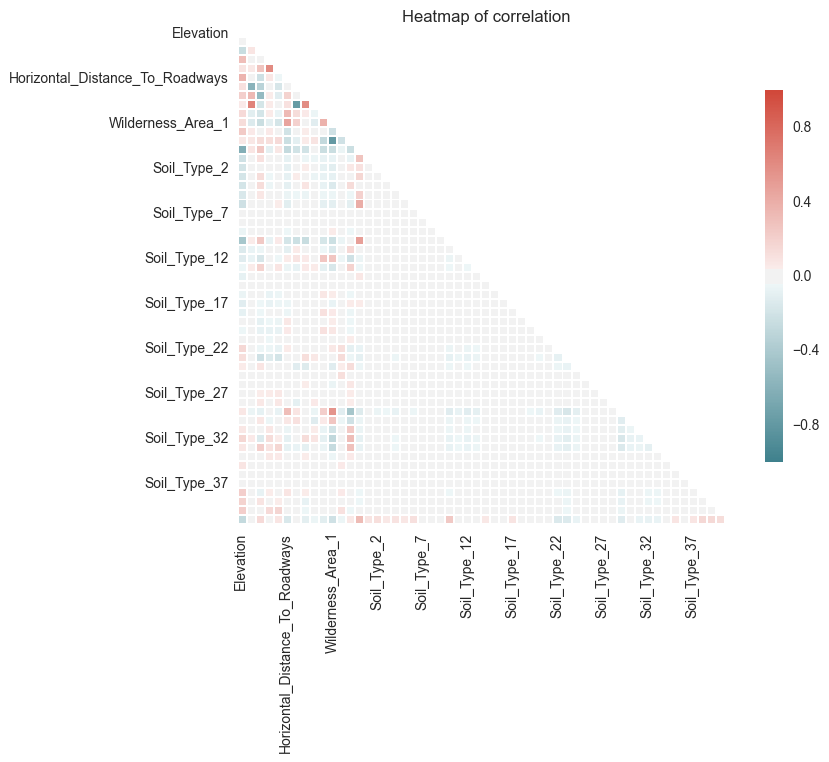

In [133]:
#set up figure
f, ax = plt.subplots(figsize=(8, 12))

# create a mask for redundant correlations
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.xticks(rotation=45)

# draw the correlation heatmap
sns.heatmap( corr, mask=mask, square=True, xticklabels=5, yticklabels=5, linewidths=.5
                   ,cbar_kws={"shrink": .4},cmap = sns.diverging_palette(210, 15, as_cmap=True), ax=ax)

ax.set_title('Heatmap of correlation')
plt.show()